## [NYCDSA Capstone Project] 
# Women's Softball League Power Ranking Estimate

<br>
Koeun Lim (koeunlim@alum.mit.edu)<br>
Kevin Haghi (kevin.haghi@gmail.com)<br>


# Step 5-2. Modeling 1 - RPI Prediction - Linear Regression

---
## Project Description



### Project Outline
- Step 1. Web scraping
- Step 2. Clean data
- Step 3. EDA
- Step 4. Imputation & PCA
- Step 5-1. Modeling (1) RPI prediction based on stats - XGboost regression
- Step 5-2. Modeling (1) RPI prediction based on stats - Linear regression
- Step 6-1. Modeling (2) WS 64 Seed prediction based on stats - XGboost classification
- Step 6-2. Modeling (2) WS 64 Seed prediction based on stats - Logistic regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
from datetime import datetime
from scipy import stats
from matplotlib import pyplot as plt

import xgboost as xgb
from xgboost import plot_importance

import sklearn.model_selection as ms
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#import warnings
#warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [3]:
y_RPI = pd.read_csv('Data/y_RPI.csv').astype('float')
y_RPI_2019 = pd.read_csv('Data/y_RPI_2019.csv').astype('float')

X = pd.read_csv('Data/X.csv')
X_2019 = pd.read_csv('Data/X_2019.csv')
X_famd = pd.read_csv('Data/X_famd.csv')
X_famd_2019 = pd.read_csv('Data/X_famd_2019.csv')
X_College = pd.read_csv('Data/X_College.csv')
X_College_2019 = pd.read_csv('Data/X_College_2019.csv')

In [4]:
y_RPI_logit = np.log(y_RPI/(y_RPI.max()+1)/(1-y_RPI/(y_RPI.max()+1)))
y_RPI_2019_logit = np.log(y_RPI_2019/(y_RPI_2019.max()+1)/(1-y_RPI_2019/(y_RPI_2019.max()+1)))

In [5]:
X_famd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,2.170850,-0.027647,0.127369,1.219246,0.368641,-0.196787,-0.130418,-0.171609,-0.352457,0.058697,-0.383129,0.073038,1.005647,0.595547,0.468127,-0.074023,-0.904480,0.720769,-0.207444,-0.485857,-0.214408,-0.676500,-0.153969,-0.128498,-0.310688,-0.043215,0.134537,0.032437,-0.287246,0.018377,0.098459,-0.270373,-0.335707,-0.448651,0.572197,0.410523,-0.068122,-0.046195,0.043469,-0.303446,-0.294815,-0.532836,0.235490,-0.178836,-0.052232,-0.010824,0.022264
1,2.494396,-0.349768,-0.344156,-0.027539,-0.393484,-0.083979,-0.645833,1.197497,-0.807566,0.329022,-0.167865,-0.454194,0.645177,0.477687,-0.396526,0.407270,0.098008,-0.408822,0.217627,0.550522,0.343296,0.310762,-0.242690,0.102283,0.435957,0.295430,-0.019137,-0.204928,0.257748,-0.033217,-0.076521,0.637219,-0.116861,-0.095138,0.027686,0.371716,0.534058,0.189141,-0.112994,-0.270728,-0.008564,-0.010155,0.190365,0.201579,-0.095771,-0.000673,0.000086
2,2.457301,-0.283095,-0.206933,-0.126478,-0.400174,0.167933,-0.737496,1.330876,-0.816391,0.307917,-0.206095,-0.494546,0.657509,0.443358,-0.414156,0.395289,0.065043,-0.445311,0.208540,0.538905,0.336216,0.306693,-0.206007,0.090296,0.440320,0.308226,-0.028989,-0.224333,0.258356,-0.020713,-0.057799,0.639894,-0.185656,-0.244586,-0.110804,-0.140564,0.020098,0.134771,-0.115916,-0.294089,0.135937,0.302643,0.244900,0.082033,-0.046263,-0.009489,-0.004715
3,2.908420,-0.812397,-0.120084,-0.298639,0.672517,0.069064,0.087966,0.139732,0.310211,0.063894,0.114614,-0.022350,0.665968,0.105203,-0.150634,-0.645803,0.153987,-0.398356,0.099389,0.377348,0.142229,0.649320,0.818685,0.093924,-0.460005,-1.153012,-0.532278,1.535312,-0.473104,0.152722,-0.480115,0.391411,-0.465212,0.441163,-0.201934,0.192078,0.115855,0.443823,-0.596109,-0.125310,0.085299,0.075666,0.421896,0.160937,0.093301,-0.004882,0.025164
4,2.452516,-0.725179,-0.179109,-0.183864,-0.318930,0.200328,-0.708240,1.214912,-0.771176,0.350310,-0.168707,-0.451476,0.672903,0.490794,-0.377889,0.386218,0.058440,-0.463347,0.218717,0.552809,0.343879,0.272640,-0.235689,0.091781,0.435474,0.315789,-0.024178,-0.214399,0.252061,-0.025570,-0.038579,0.615931,-0.221270,-0.344349,-0.016926,0.053174,0.357887,-0.270456,-0.212351,-0.516283,-0.072864,-0.125879,0.404643,0.165810,-0.036130,0.006442,-0.008450


In [6]:
ridge = Ridge()

### Ridge Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_famd, y_RPI_logit, test_size=0.3, random_state=1)

train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha, normalize=False)  
          ridge.fit(X_train,y_train)
          train_R2.append(ridge.score(X_train,y_train))
          test_R2.append(ridge.score(X_test,y_test))

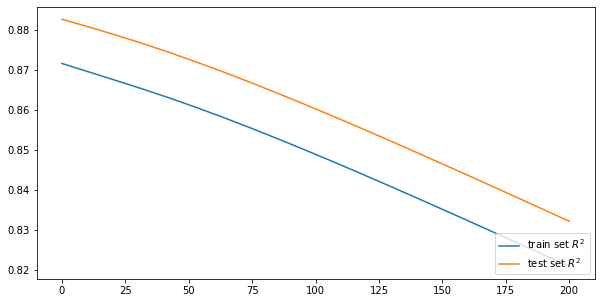

In [8]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)
plt.show()

In [9]:
diffR2 = pd.DataFrame()
diffR2['alpha']=alphaRange
diffR2['diffR2']=abs(np.array(train_R2)-np.array(test_R2))
best_alpha = diffR2.alpha[diffR2.diffR2 == min(diffR2.diffR2)]
best_alpha = 0

In [10]:
ridge.set_params(alpha=best_alpha)
ridge.fit(X_famd, y_RPI_logit)
coefDF = pd.DataFrame(ridge.coef_.reshape([-1,1]))
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are \n %s' %(coefDF))

The intercept is -0.0207
The slopes are 
            0
0  -1.410940
1   0.530502
2   0.367045
3  -0.422266
4   0.129468
5   0.353934
6   0.026242
7   0.006709
8   0.248811
9   0.260924
10  0.147366
11  0.066717
12  0.077183
13  0.091131
14 -0.059386
15 -0.090416
16  0.044627
17  0.148852
18  0.084654
19  0.064255
20 -0.132918
21  0.092411
22 -0.241612
23  0.033830
24 -0.015595
25  0.071913
26  0.050368
27  0.139755
28  0.020663
29 -0.087190
30  0.168572
31 -0.225926
32  0.418077
33 -0.633618
34 -0.167072
35  0.428538
36 -0.152340
37  0.188488
38  0.004725
39  0.428758
40  0.169340
41 -0.082332
42  0.600871
43  0.429143
44 -0.494774
45 -1.355393
46  0.189925




Best Train R_squared:
0.8701171885213257


Best Test R_squared:
0.889687571375569


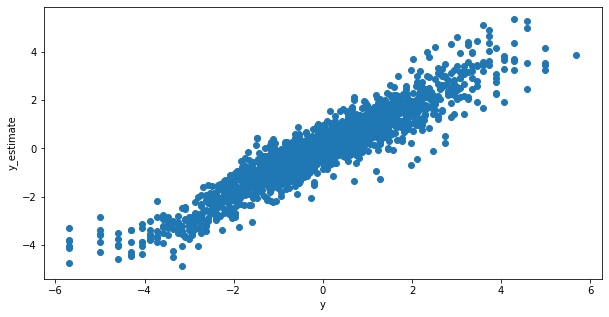

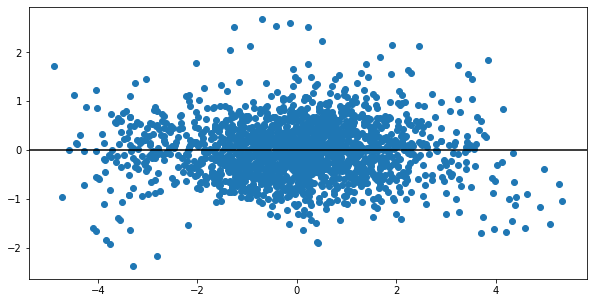

In [11]:
print('\n\nBest Train R_squared:')
print(r2_score(y_train, ridge.predict(X_train)))
print('\n\nBest Test R_squared:')
print(r2_score(y_test, ridge.predict(X_test)))

plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(y_RPI_logit,ridge.predict(X_famd))
plt.xlabel('y')
plt.ylabel('y_estimate')
plt.show()

plt.scatter(ridge.predict(X_famd),y_RPI_logit-ridge.predict(X_famd))
plt.axhline(color='black')
plt.show()



Best Train R_squared:
0.8768319645567638


Best Test R_squared:
0.9038688355824247


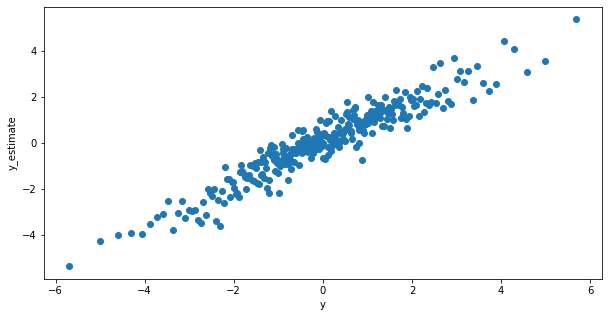

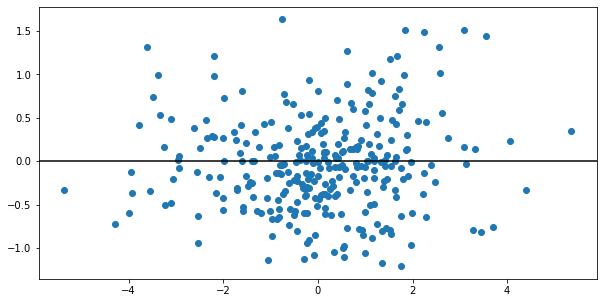

In [12]:
print('\n\nBest Train R_squared:')
print(r2_score(y_RPI_logit, ridge.predict(X_famd)))
print('\n\nBest Test R_squared:')
print(r2_score(y_RPI_2019_logit, ridge.predict(X_famd_2019)))

plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(y_RPI_2019_logit,ridge.predict(X_famd_2019))
plt.xlabel('y')
plt.ylabel('y_estimate')
plt.show()

plt.scatter(ridge.predict(X_famd_2019),y_RPI_2019_logit-ridge.predict(X_famd_2019))
plt.axhline(color='black')
plt.show()

In [13]:
# boostrap resampling to generate prediction probability
n_bootstrap = 1000

y_ex = y_RPI_2019_logit
X_ex = pd.DataFrame(X_famd_2019)
df_y_ex = pd.DataFrame()
for i_b in range(n_bootstrap):
    idx_resample =  resample(range(len(y_RPI_logit)), replace=True, n_samples=len(y_RPI_logit))
    X_i = X_famd.iloc[idx_resample]
    y_i = y_RPI_logit.iloc[idx_resample]
    #w_i = w.iloc[idx_resample]
    ridge.fit(X_i,y_i)
    y_ex_est = pd.DataFrame(ridge.predict(X_ex).reshape([1,-1]))
    df_y_ex = df_y_ex.append(y_ex_est,ignore_index = True)
    #fname_i = 'XGBoost_RPI/xgbmodel_rpi_bs_' + str(i_b) + '.obj'
    #file_i = open(fname_i,'wb')
    #pickle.dump(best_xgbmodel,file_i)

df_y_ex.columns = X_College_2019.College

In [14]:
df_y_ex

College,Oklahoma,UCLA,Washington,Arizona,Florida State,Alabama,Minnesota,Texas,Oklahoma State,Florida,James Madison,Northwestern,LSU,Michigan,Ole Miss,Kentucky,Tennessee,ULL,Texas Tech,Auburn,North Carolina,Drake,South Carolina,Arizona State,Georgia,Missouri,Virginia Tech,Mississippi State,Wisconsin,Tulsa,Stanford,South Florida,Arkansas,Louisville,Boise State,Houston,Notre Dame,Colorado State,Ohio State,Lipscomb,Illinois,Oregon State,Southern Ill.,Louisiana Tech,UNLV,CSU Fullerton,North Dakota State,Iowa State,San Jose State,Texas A&M,UCF,Indiana,UT Arlington,North Texas,Liberty,Seattle U,WKU,Baylor,Southeast Mo. State,Oregon,Wichita State,Sam Houston State,Fresno State,Texas State,Troy,California,LMU (CA),UC Davis,Marshall,Longwood,Elon,New Mexico State,UNCG,Grand Canyon,Kent State,Coastal Carolina,DePaul,Jacksonville State,Miami (OH),Long Beach State,USC Upstate,Nicholls State,FGCU,NC State,McNeese State,Bradley,Missouri State,Duke,Rutgers,Georgia Tech,Eastern Ky.,Purdue,Hawaii,UNI,Nevada,Chattanooga,Boston U,Southern Miss.,San Diego State,Utah,Nebraska,Ohio,Austin Peay,North Florida,BYU,SFA,South Dakota State,Weber State,North Ala.,Appalachian State,Iowa,Stony Brook,State John's (NY),UMass Lowell,George Washington,Virginia,Toledo,Northern Ill.,FIU,LIU,Towson,Belmont,Maryland,Ball State,UIC,...,Ga. Southern,UTEP,Gardner-Webb,Creighton,Seton Hall,UT Martin,Lamar University,Pittsburgh,Houston Baptist,Western Mich.,Marist,ETSU,Tennessee Tech,UMBC,SIUE,Florida A&M,Colgate,Cal Poly,Columbia,Charlotte,Detroit Mercy,Jacksonville,Statetson,Central Ark.,Idaho State,Dayton,Furman,Bethune-Cookman,Binghamton,California Baptist,Bowling Green,Indiana State,Saint Louis,UMKC,La.-Monroe,Portland State,Charleston So.,Drexel,Army West Point,George Mason,Penn,Evansville,Valparaiso,Western Caro.,Prairie View,Texas Southern,Montana,Pacific,Fairfield,Utah Valley,Eastern Ill.,Butler,Georgetown,North Dakota,Tennessee State,Georgia State,Abilene Christian,Sacred Heart,Siena,Dartmouth,Youngstown State,Northern Colo.,Northern Ky.,Hampton,Saint Mary's (CA),UC Santa Barbara,Alabama State,Iona,San Diego,Santa Clara,Bryant,Mount State Mary's,Princeton,Manhattan,Norfolk State,Wright State,Hartford,A&M-Corpus Christi,IUPUI,Purdue Fort Wayne,Maine,Yale,Oakland,CSU Bakersfield,Canisius,Buffalo,Rhode Island,Akron,Robert Morris,Alabama A&M,UIW,Presbyterian,N.C. Central,Niagara,Central Conn. State,Wagner,Alcorn,Holy Cross,Cleveland State,Omaha,Morgan State,Green Bay,Mississippi Val.,Quinnipiac,Lafayette,Jackson State,Brown,Howard,Fairleigh Dickinson,La Salle,Morehead State,Cornell,N.C. A&T,Delaware State,Rider,Southern Utah,Coppin State,Savannah State,State Bonaventure,Grambling,Ark.-Pine Bluff,UMES,Southern U.,Saint Peter's,South Carolina State
0,-5.063207,-3.940389,-3.622648,-3.748356,-3.709185,-3.478148,-3.078066,-2.979865,-2.516963,-3.591808,-3.022165,-2.373046,-3.234010,-2.811915,-2.816187,-2.898631,-3.222561,-3.387372,-2.559049,-3.091803,-1.926781,-1.922480,-2.292990,-1.789499,-3.331377,-2.445040,-3.417211,-2.158730,-2.612269,-0.922940,-1.476581,-1.382099,-2.178941,-1.683973,-1.679958,-1.883858,-2.248251,-2.079021,-2.455313,-1.189558,-1.071106,-1.045492,-1.330369,-1.411742,-1.894329,-1.490897,-1.502602,-1.389115,-0.870453,-1.667255,-0.848840,-1.617466,-1.049277,-1.092795,-1.653117,-0.646547,-1.740529,-0.365715,-1.437609,-0.632839,-1.265416,-0.627212,-1.422741,-0.896602,-1.102711,-1.921260,-0.477127,-2.073188,-1.576575,-0.299771,-0.098757,-0.311461,-0.346129,-0.547191,-0.164829,-1.251544,-0.410468,-0.709589,-0.833741,-1.281723,-2.120891,-0.925317,-1.013850,-0.691906,-0.197341,-0.452887,-0.320318,-0.557742,-0.938147,-0.643535,-0.262797,-0.862639,-1.469236,-0.943159,-0.451581,-0.717213,-0.336677,-1.121618,0.408834,-0.181152,-0.442463,-0.365946,-0.783011,-0.364111,-0.605657,-0.405899,-0.357803,0.399534,-0.038139,-1.109681,-0.266627,-0.151379,-0.022247,0.451396,-0.380005,0.248644,0.541752,-0.250822,-0.024927,0.140495,-0.258345,-0.439627,0.172496,-0.378428,-0.225

In [16]:
df_y_rank = df_y_ex.rank(axis=1)
df_y_rank.to_csv('LM_RPI/RPI_prediction_logit_1000.csv',index = False)
df_y_rank

College,Oklahoma,UCLA,Washington,Arizona,Florida State,Alabama,Minnesota,Texas,Oklahoma State,Florida,James Madison,Northwestern,LSU,Michigan,Ole Miss,Kentucky,Tennessee,ULL,Texas Tech,Auburn,North Carolina,Drake,South Carolina,Arizona State,Georgia,Missouri,Virginia Tech,Mississippi State,Wisconsin,Tulsa,Stanford,South Florida,Arkansas,Louisville,Boise State,Houston,Notre Dame,Colorado State,Ohio State,Lipscomb,Illinois,Oregon State,Southern Ill.,Louisiana Tech,UNLV,CSU Fullerton,North Dakota State,Iowa State,San Jose State,Texas A&M,UCF,Indiana,UT Arlington,North Texas,Liberty,Seattle U,WKU,Baylor,Southeast Mo. State,Oregon,Wichita State,Sam Houston State,Fresno State,Texas State,Troy,California,LMU (CA),UC Davis,Marshall,Longwood,Elon,New Mexico State,UNCG,Grand Canyon,Kent State,Coastal Carolina,DePaul,Jacksonville State,Miami (OH),Long Beach State,USC Upstate,Nicholls State,FGCU,NC State,McNeese State,Bradley,Missouri State,Duke,Rutgers,Georgia Tech,Eastern Ky.,Purdue,Hawaii,UNI,Nevada,Chattanooga,Boston U,Southern Miss.,San Diego State,Utah,Nebraska,Ohio,Austin Peay,North Florida,BYU,SFA,South Dakota State,Weber State,North Ala.,Appalachian State,Iowa,Stony Brook,State John's (NY),UMass Lowell,George Washington,Virginia,Toledo,Northern Ill.,FIU,LIU,Towson,Belmont,Maryland,Ball State,UIC,...,Ga. Southern,UTEP,Gardner-Webb,Creighton,Seton Hall,UT Martin,Lamar University,Pittsburgh,Houston Baptist,Western Mich.,Marist,ETSU,Tennessee Tech,UMBC,SIUE,Florida A&M,Colgate,Cal Poly,Columbia,Charlotte,Detroit Mercy,Jacksonville,Statetson,Central Ark.,Idaho State,Dayton,Furman,Bethune-Cookman,Binghamton,California Baptist,Bowling Green,Indiana State,Saint Louis,UMKC,La.-Monroe,Portland State,Charleston So.,Drexel,Army West Point,George Mason,Penn,Evansville,Valparaiso,Western Caro.,Prairie View,Texas Southern,Montana,Pacific,Fairfield,Utah Valley,Eastern Ill.,Butler,Georgetown,North Dakota,Tennessee State,Georgia State,Abilene Christian,Sacred Heart,Siena,Dartmouth,Youngstown State,Northern Colo.,Northern Ky.,Hampton,Saint Mary's (CA),UC Santa Barbara,Alabama State,Iona,San Diego,Santa Clara,Bryant,Mount State Mary's,Princeton,Manhattan,Norfolk State,Wright State,Hartford,A&M-Corpus Christi,IUPUI,Purdue Fort Wayne,Maine,Yale,Oakland,CSU Bakersfield,Canisius,Buffalo,Rhode Island,Akron,Robert Morris,Alabama A&M,UIW,Presbyterian,N.C. Central,Niagara,Central Conn. State,Wagner,Alcorn,Holy Cross,Cleveland State,Omaha,Morgan State,Green Bay,Mississippi Val.,Quinnipiac,Lafayette,Jackson State,Brown,Howard,Fairleigh Dickinson,La Salle,Morehead State,Cornell,N.C. A&T,Delaware State,Rider,Southern Utah,Coppin State,Savannah State,State Bonaventure,Grambling,Ark.-Pine Bluff,UMES,Southern U.,Saint Peter's,South Carolina State
0,1.0,2.0,5.0,3.0,4.0,7.0,14.0,16.0,22.0,6.0,15.0,25.0,11.0,19.0,18.0,17.0,12.0,9.0,21.0,13.0,33.0,34.0,26.0,38.0,10.0,24.0,8.0,29.0,20.0,71.0,48.0,54.0,28.0,40.0,41.0,37.0,27.0,31.0,23.0,59.0,64.0,66.0,55.0,52.0,36.0,47.0,46.0,53.0,73.0,42.0,75.0,44.0,65.0,63.0,43.0,84.0,39.0,105.0,50.0,86.0,57.0,87.0,51.0,72.0,62.0,35.0,93.0,32.0,45.0,112.0,134.0,111.0,108.0,92.0,127.0,58.0,99.0,81.0,77.0,56.0,30.0,70.0,67.0,82.0,121.0,94.0,110.0,90.0,69.0,85.0,115.0,74.0,49.0,68.0,95.0,80.0,109.0,60.0,175.0,125.0,97.0,104.0,78.0,106.0,89.0,100.0,107.0,174.0,139.0,61.0,114.0,128.0,141.0,182.0,101.0,164.0,186.0,117.0,140.0,153.0,116.0,98.0,156.0,102.0,119.0,...,124.0,191.0,123.0,135.0,183.0,145.0,198.0,179.0,158.0,166.0,187.0,151.0,185.0,144.0,232.0,264.0,242.0,201.0,196.0,219.0,184.0,181.0,180.0,146.0,239.0,224.0,227.0,250.0,243.0,143.0,199.0,200.0,214.0,161.0,177.0,190.0,203.0,76.0,206.0,192.0,176.0,217.0,208.0,202.0,233.0,274.0,204.0,207.0,213.0,237.0,236.0,172.0,268.0,197.0,230.0,216.0,211.0,234.0,257.0,240.0,221.0,254.0,228.0,194.0,229.0,193.0,273.0,247.0,209.0,222.0,253.0,189.0,246.0,235.0,215.0,265.0,249.0,275.0,260.0,241.0,267.0,218.0,244.0,238.0,276.0,220.0,195.0,225.0,272.0,271.0,263.0,245.0,258.0,278.0,226.0,270.0,284.0,251.0,

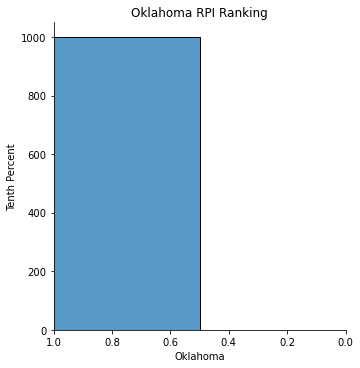

Actual rank:  1.0
Predicted rank:  1.0


In [27]:
idx_ex = 0
college = df_y_rank.columns[idx_ex]
bins = int(np.max(df_y_rank[college]) - np.min(df_y_rank[college]))
if bins == 0:
    bins = 1
sn.displot(data=df_y_rank,x=college,kde=False,bins=bins) 
plt.title(college + ' RPI Ranking')
plt.ylabel('Tenth Percent')
plt.xlim(1,np.round(df_y_rank[college].max()/10)*10)
plt.show()
print('Actual rank: ', y_RPI_2019.RPI_Ranking.loc[idx_ex])
print('Predicted rank: ',df_y_rank[college].value_counts().idxmax())

In [ ]:
# y_RPI_2019.loc[idx_ex]

In [28]:
df_y_rank[college].max()

1.0